# data import
First, import the necessary packages that will be used in our analysis and prediction 

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, preprocessing, svm
from sklearn.preprocessing import StandardScaler, Normalizer
import math
#import matplotlib
import seaborn as sns

In [135]:
#import the data from the csv file
df = pd.read_csv('autos.csv', sep=',', header=0, encoding='cp1252')
df.head(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [136]:
#overview the data

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
dateCrawled            371528 non-null object
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null object
nrOfPictures           371528 non-null int64
postalCode             371528 non-null int64
lastSeen              

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


From the result we can see there are a lot of null value in the different variables
# data cleaning

In [137]:
# go over some strange variables
print(df.nrOfPictures.value_counts())
print(df.abtest.value_counts())
print(df.offerType.value_counts())
print(df.seller.value_counts())



0    371528
Name: nrOfPictures, dtype: int64
test       192585
control    178943
Name: abtest, dtype: int64
Angebot    371516
Gesuch         12
Name: offerType, dtype: int64
privat        371525
gewerblich         3
Name: seller, dtype: int64


In [138]:
#from the first check, we can drop the columns that have not a significant difference of the binomial variable.
df.drop(["nrOfPictures"], axis = 1, inplace = True) 
df.drop(["seller"], axis = 1, inplace = True) 
df.drop(["offerType"], axis = 1, inplace = True) 


#I choose to keep the 

In [139]:
df.head(5)

,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21


drop the meaningless columns

In [140]:
df.drop(['dateCrawled','postalCode','lastSeen','abtest','dateCreated'],axis = 1, inplace = True)
df.head()

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,Golf_3_1.6,480,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
1,A5_Sportback_2.7_Tdi,18300,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein


In [ ]:
df['monthOfRegistration'] = [1 for x in range(0, 900)] 

In [147]:
df.monthOfRegistration.value_counts()
#dealing with the 0 month: I will deivide the month into quarter to solve the problem
df['monthOfRegistration'][df['monthOfRegistration']<4]=1
df['monthOfRegistration'][(df['monthOfRegistration']<7 )& (df['monthOfRegistration']>3)]=2
df['monthOfRegistration'][(df['monthOfRegistration']<9 )& (df['monthOfRegistration']>5) ]=3
df['monthOfRegistration'][(df['monthOfRegistration']<13) & (df['monthOfRegistration']>9)]=4
df['monthOfRegistration']= pd.to_numeric(df['monthOfRegistration'])

/Users/lukezhao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/lukezhao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/lukezhao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

In [149]:
df.head(10)

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,Golf_3_1.6,480,NaN,1993,manuell,0,golf,150000,1,benzin,volkswagen,NaN
1,A5_Sportback_2.7_Tdi,18300,coupe,2011,manuell,190,NaN,125000,1,diesel,audi,ja
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatik,163,grand,125000,3,diesel,jeep,NaN
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,1,benzin,volkswagen,nein
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,3,diesel,skoda,nein
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,manuell,102,3er,150000,4,benzin,bmw,ja
6,Peugeot_206_CC_110_Platinum,2200,cabrio,2004,manuell,109,2_reihe,150000,3,benzin,peugeot,nein
7,VW_Derby_Bj_80__Scheunenfund,0,limousine,1980,manuell,50,andere,40000,3,benzin,volkswagen,nein
8,Ford_C___Max_Titanium_1_0_L_EcoBoost,14500,bus,2014,manuell,125,c_max,30000,3,benzin,ford,NaN
9,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,999,kleinwagen,1998,manuell,101,golf,150000,1,NaN,volkswagen,NaN


In [150]:
#drop the duplicate data
cleandata1 = df.drop_duplicates(['name','price','vehicleType','yearOfRegistration','gearbox','powerPS',
                                 'model','kilometer','monthOfRegistration','fuelType','brand'
                                 ,'notRepairedDamage'])

In [79]:
cleandata1.head()
cleandata1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360039 entries, 0 to 371527
Data columns (total 12 columns):
name                   360039 non-null object
price                  360039 non-null int64
vehicleType            322685 non-null object
yearOfRegistration     360039 non-null int64
gearbox                341113 non-null object
powerPS                360039 non-null int64
model                  339780 non-null object
kilometer              360039 non-null int64
monthOfRegistration    360039 non-null int64
fuelType               327009 non-null object
brand                  360039 non-null object
notRepairedDamage      290114 non-null object
dtypes: int64(5), object(7)
memory usage: 35.7+ MB


In [151]:
#refill the missing value
cleandata1.isnull().sum()
#cleandata2 = cleandata 

name                       0
price                      0
vehicleType            37371
yearOfRegistration         0
gearbox                19032
powerPS                    0
model                  20263
kilometer                  0
monthOfRegistration        0
fuelType               33044
brand                      0
notRepairedDamage      70090
dtype: int64

In [152]:
#in order to not add noise in the dataset, I decide to try to delete the null value and then check the data volumn.
cleandata2 = cleandata1.dropna()

In [153]:
cleandata2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254008 entries, 3 to 371527
Data columns (total 12 columns):
name                   254008 non-null object
price                  254008 non-null int64
vehicleType            254008 non-null object
yearOfRegistration     254008 non-null int64
gearbox                254008 non-null object
powerPS                254008 non-null int64
model                  254008 non-null object
kilometer              254008 non-null int64
monthOfRegistration    254008 non-null int64
fuelType               254008 non-null object
brand                  254008 non-null object
notRepairedDamage      254008 non-null object
dtypes: int64(5), object(7)
memory usage: 25.2+ MB


In [154]:
# the remaining data has 252k records, it deleted nearly 1/3 records.
# I want to create a high dimensioanl variable to handle the missing value
def set_vehicleType(df):
    df.loc[(df.vehicleType.notnull()), 'vehicletype_unknown']= 0
    df.loc[(df.vehicleType.isnull()), 'vehicletype_unknown']= 1
    return df
def set_notRepairedDamage(df):
    df.loc[(df.notRepairedDamage.notnull()), 'notRepaired_unknown']= 0
    df.loc[(df.notRepairedDamage.isnull()), 'notRepaired_unknown']= 1
    return df
def set_fuelType(df):
    df.loc[(df.fuelType.notnull()), 'fuelType_unknown']= 0
    df.loc[(df.fuelType.isnull()), 'fuelType_unknown']= 1
    return df
def set_gearbox(df):
    df.loc[(df.gearbox.notnull()), 'gearbox_unknown']= 0
    df.loc[(df.gearbox.isnull()), 'gearbox_unknown']= 1
    return df
def set_model(df):
    df.loc[(df.model.notnull()), 'model_unknown']= 0
    df.loc[(df.model.isnull()), 'model_unknown']= 1
    return df

In [155]:
set_vehicleType(cleandata1)
set_notRepairedDamage(cleandata1)
set_fuelType(cleandata1)
set_gearbox(cleandata1)
set_model(cleandata1)

/Users/lukezhao/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/lukezhao/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,vehicletype_unknown,notRepaired_unknown,fuelType_unknown,gearbox_unknown,model_unknown
0,Golf_3_1.6,480,NaN,1993,manuell,0,golf,150000,1,benzin,volkswagen,NaN,1.0,1.0,0.0,0.0,0.0
1,A5_Sportback_2.7_Tdi,18300,coupe,2011,manuell,190,NaN,125000,1,diesel,audi,ja,0.0,0.0,0.0,0.0,1.0
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatik,163,grand,125000,3,diesel,jeep,NaN,0.0,1.0,0.0,0.0,0.0
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,1,benzin,volkswagen,nein,0.0,0.0,0.0,0.0,0.0
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,3,diesel,skoda,nein,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,Suche_t4___vito_ab_6_sitze,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,1.0,1.0,1.0,1.0,1.0
371524,Smart_smart_leistungssteigerung_100ps,1199,cabrio,2000,automatik,101,fortwo,125000,1,benzin,smart,nein,0.0,0.0,0.0,0.0,0.0
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,bus,1996,manuell,102,transporter,150000,1,diesel,volkswagen,nein,0.0,0.0,0.0,0.0,0.0
371526,VW_Golf_Kombi_1_9l_TDI,3400,kombi,2002,manuell,100,golf,150000,1,diesel,volkswagen,NaN,0.0,1.0,0.0,0.0,0.0


In [164]:
cleandata1.head(10)

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,vehicletype_unknown,notRepaired_unknown,fuelType_unknown,gearbox_unknown,model_unknown
0,Golf_3_1.6,480,not-declared,1993,manuell,0,golf,150000,1,benzin,volkswagen,not-declared,1.0,1.0,0.0,0.0,0.0
1,A5_Sportback_2.7_Tdi,18300,coupe,2011,manuell,190,not-declared,125000,1,diesel,audi,ja,0.0,0.0,0.0,0.0,1.0
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatik,163,grand,125000,3,diesel,jeep,not-declared,0.0,1.0,0.0,0.0,0.0
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,1,benzin,volkswagen,nein,0.0,0.0,0.0,0.0,0.0
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,3,diesel,skoda,nein,0.0,0.0,0.0,0.0,0.0
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,manuell,102,3er,150000,4,benzin,bmw,ja,0.0,0.0,0.0,0.0,0.0
6,Peugeot_206_CC_110_Platinum,2200,cabrio,2004,manuell,109,2_reihe,150000,3,benzin,peugeot,nein,0.0,0.0,0.0,0.0,0.0
7,VW_Derby_Bj_80__Scheunenfund,0,limousine,1980,manuell,50,andere,40000,3,benzin,volkswagen,nein,0.0,0.0,0.0,0.0,0.0
8,Ford_C___Max_Titanium_1_0_L_EcoBoost,14500,bus,2014,manuell,125,c_max,30000,3,benzin,ford,not-declared,0.0,1.0,0.0,0.0,0.0
9,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,999,kleinwagen,1998,manuell,101,golf,150000,1,not-declared,volkswagen,not-declared,0.0,1.0,1.0,0.0,0.0


In [157]:
#replace the the null-value
cleandata1['notRepairedDamage'].fillna(value='not-declared', inplace=True)
cleandata1['fuelType'].fillna(value='not-declared', inplace=True)
cleandata1['gearbox'].fillna(value='not-declared', inplace=True)
cleandata1['vehicleType'].fillna(value='not-declared', inplace=True)
cleandata1['model'].fillna(value='not-declared', inplace=True)

/Users/lukezhao/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [206]:
print(cleandata1["yearOfRegistration"].describe())
print(cleandata1["price"].describe())
print(cleandata1["powerPS"].describe())



count    361724.000000
mean       2004.585148
std          93.963666
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: yearOfRegistration, dtype: float64
count    3.617240e+05
mean     1.762325e+04
std      3.636251e+06
min      0.000000e+00
25%      1.125000e+03
50%      2.950000e+03
75%      7.200000e+03
max      2.147484e+09
Name: price, dtype: float64
count    361724.00000
mean        115.72633
std         194.34083
min           0.00000
25%          70.00000
50%         105.00000
75%         150.00000
max       20000.00000
Name: powerPS, dtype: float64


In [165]:
#delte the outlier
cleandf = cleandata1[
        (cleandata1.yearOfRegistration <= 2016) 
      & (cleandata1.yearOfRegistration >= 1950) 
      & (cleandata1.price >= 100) 
      & (cleandata1.price <= 150000) 
      & (cleandata1.powerPS >= 10) 
      & (cleandata1.powerPS <= 500)]


In [168]:
cleandf.head()
#cleandf.info()

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,vehicletype_unknown,notRepaired_unknown,fuelType_unknown,gearbox_unknown,model_unknown
1,A5_Sportback_2.7_Tdi,18300,coupe,2011,manuell,190,not-declared,125000,1,diesel,audi,ja,0.0,0.0,0.0,0.0,1.0
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatik,163,grand,125000,3,diesel,jeep,not-declared,0.0,1.0,0.0,0.0,0.0
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,1,benzin,volkswagen,nein,0.0,0.0,0.0,0.0,0.0
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,3,diesel,skoda,nein,0.0,0.0,0.0,0.0,0.0
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,manuell,102,3er,150000,4,benzin,bmw,ja,0.0,0.0,0.0,0.0,0.0


gearbox
manuell         231173
automatik        66777
not-declared      5258
Name: gearbox, dtype: int64


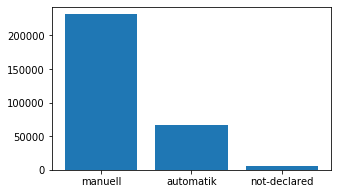

model
golf            24712
andere          21697
3er             17591
not-declared    11346
polo            10438
Name: model, dtype: int64


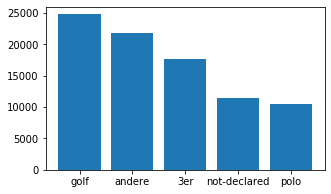

brand
volkswagen       64597
bmw              34272
opel             31643
mercedes_benz    29508
audi             27880
Name: brand, dtype: int64


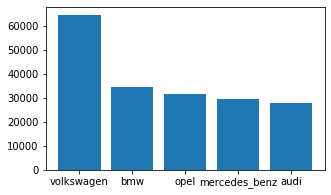

vehicleType
limousine     84458
kleinwagen    68171
kombi         59697
bus           26947
cabrio        20881
Name: vehicleType, dtype: int64


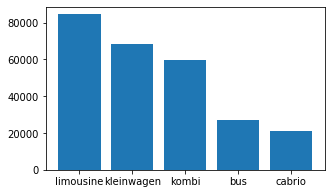

fuelType
benzin          189235
diesel           93064
not-declared     15397
lpg               4643
cng                474
Name: fuelType, dtype: int64


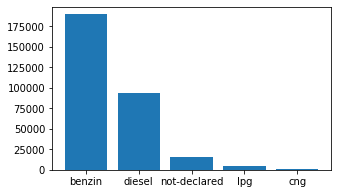

notRepairedDamage
nein            232830
not-declared     42102
ja               28276
Name: notRepairedDamage, dtype: int64


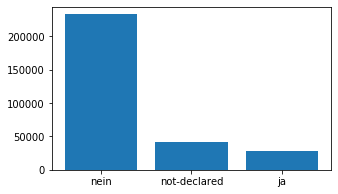

In [160]:
#visualize data
categories = ['gearbox', 'model', 'brand', 'vehicleType', 'fuelType', 'notRepairedDamage']

for c in categories:
    v = cleandf[c].unique()
    
    g = cleandf.groupby(by=c)[c].count().sort_values(ascending=False)
    r = range(min(len(v), 5))

    print(g.head())
    plt.figure(figsize=(5,3))
    plt.bar(r, g.head()) 
    #plt.xticks(r, v)
    plt.xticks(r, g.index)
    plt.show()

# feature engineering

In [169]:
#except for name, we want to transform all the string value into numeric value inorder to better fit the model using the new feature
labels = [ 'gearbox', 'notRepairedDamage', 'model', 'brand', 'fuelType', 'vehicleType']
les = {}

for l in labels:
    les[l] = preprocessing.LabelEncoder()
    les[l].fit(cleandf[l])
    tr = les[l].transform(cleandf[l]) 
    cleandf.loc[:, l + '_feat'] = pd.Series(tr, index=cleandf.index)

labeled = cleandf[ ['price'
                        ,'yearOfRegistration'
                        ,'powerPS'
                        ,'kilometer'
                        ,'monthOfRegistration'
                        ] 
                    + [x+"_feat" for x in labels]]

In [125]:
#finaldata = cleandf.drop(['gearbox', 'notRepairedDamage', 'model', 'brand', 'fuelType', 'vehicleType'],axis=1)

In [170]:
cleandf.head()

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,...,notRepaired_unknown,fuelType_unknown,gearbox_unknown,model_unknown,gearbox_feat,notRepairedDamage_feat,model_feat,brand_feat,fuelType_feat,vehicleType_feat
1,A5_Sportback_2.7_Tdi,18300,coupe,2011,manuell,190,not-declared,125000,1,diesel,...,0.0,0.0,0.0,1.0,1,0,163,1,3,3
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatik,163,grand,125000,3,diesel,...,1.0,0.0,0.0,0.0,0,2,119,14,3,8
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,1,benzin,...,0.0,0.0,0.0,0.0,1,1,118,38,1,4
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,3,diesel,...,0.0,0.0,0.0,0.0,1,1,103,31,3,4
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,manuell,102,3er,150000,4,benzin,...,0.0,0.0,0.0,0.0,1,0,11,2,1,6


In [172]:
# go over the correlation plot
corr = cleandf.corr()
print(corr)

                           price  yearOfRegistration   powerPS  kilometer  \
price                   1.000000            0.384950  0.572928  -0.444222   
yearOfRegistration      0.384950            1.000000  0.186161  -0.333619   
powerPS                 0.572928            0.186161  1.000000  -0.014385   
kilometer              -0.444222           -0.333619 -0.014385   1.000000   
monthOfRegistration     0.021705            0.025360  0.022791  -0.006351   
vehicletype_unknown    -0.081838            0.171480 -0.064463   0.039098   
notRepaired_unknown    -0.133939           -0.102989 -0.084637   0.083566   
fuelType_unknown       -0.087047           -0.018253 -0.054067   0.047032   
gearbox_unknown        -0.041020           -0.020939 -0.053153   0.000143   
model_unknown          -0.017663           -0.087758  0.007634   0.004393   
gearbox_feat           -0.297518           -0.094367 -0.447245   0.035254   
notRepairedDamage_feat -0.002657           -0.015881 -0.022882   0.005328   

# add some useful function

In [208]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier


# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [210]:
def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 12 , 8 ) )
    
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax, alpha=.7 )
        ax.set_title( var_name+' Skew: ' + str( round( float( df[ var_name ].skew() ) , 2) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        
#         ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( ['counts'] , visible=True )
        
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col)
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 14, 14 ) )
    cmap = sns.diverging_palette( 220 , 14 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))

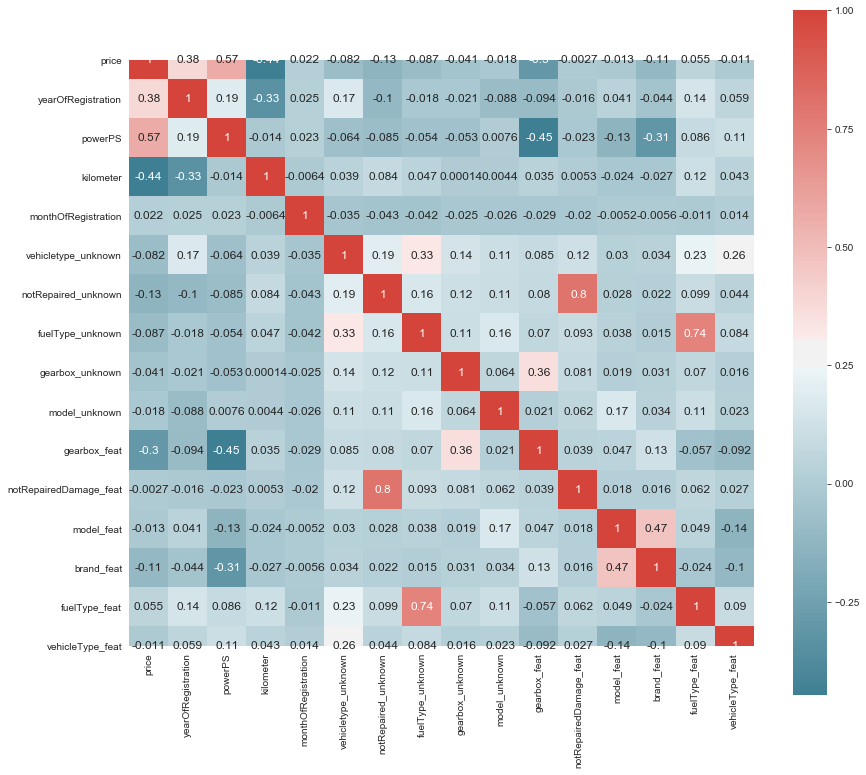

In [211]:
plot_correlation_map(cleandf)

In [183]:
cleandf.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

powerPS                   0.572928
kilometer                 0.444222
yearOfRegistration        0.384950
gearbox_feat              0.297518
notRepaired_unknown       0.133939
brand_feat                0.105662
fuelType_unknown          0.087047
vehicletype_unknown       0.081838
fuelType_feat             0.055437
gearbox_unknown           0.041020
monthOfRegistration       0.021705
model_unknown             0.017663
model_feat                0.012508
vehicleType_feat          0.010752
notRepairedDamage_feat    0.002657
Name: price, dtype: float64

In [191]:
cleandf.head()

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,...,notRepaired_unknown,fuelType_unknown,gearbox_unknown,model_unknown,gearbox_feat,notRepairedDamage_feat,model_feat,brand_feat,fuelType_feat,vehicleType_feat
1,A5_Sportback_2.7_Tdi,18300,coupe,2011,manuell,190,not-declared,125000,1,diesel,...,0.0,0.0,0.0,1.0,1,0,163,1,3,3
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatik,163,grand,125000,3,diesel,...,1.0,0.0,0.0,0.0,0,2,119,14,3,8
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,1,benzin,...,0.0,0.0,0.0,0.0,1,1,118,38,1,4
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,3,diesel,...,0.0,0.0,0.0,0.0,1,1,103,31,3,4
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,manuell,102,3er,150000,4,benzin,...,0.0,0.0,0.0,0.0,1,0,11,2,1,6


In [192]:
#extract the numeric column into the final data
finaldata = cleandf[['price','yearOfRegistration','powerPS','kilometer','monthOfRegistration','notRepaired_unknown','fuelType_unknown','vehicletype_unknown','gearbox_unknown','model_unknown','gearbox_feat','notRepairedDamage_feat','model_feat','brand_feat','fuelType_feat','vehicleType_feat']]
finaldata.head()




,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,notRepaired_unknown,fuelType_unknown,vehicletype_unknown,gearbox_unknown,model_unknown,gearbox_feat,notRepairedDamage_feat,model_feat,brand_feat,fuelType_feat,vehicleType_feat
1,18300,2011,190,125000,1,0.0,0.0,0.0,0.0,1.0,1,0,163,1,3,3
2,9800,2004,163,125000,3,1.0,0.0,0.0,0.0,0.0,0,2,119,14,3,8
3,1500,2001,75,150000,1,0.0,0.0,0.0,0.0,0.0,1,1,118,38,1,4
4,3600,2008,69,90000,3,0.0,0.0,0.0,0.0,0.0,1,1,103,31,3,4
5,650,1995,102,150000,4,0.0,0.0,0.0,0.0,0.0,1,0,11,2,1,6


In [193]:
#split the respons and variable
Y = finaldata['price']
X = finaldata.drop(['price'], axis='columns', inplace=False)

0.6550025065301707


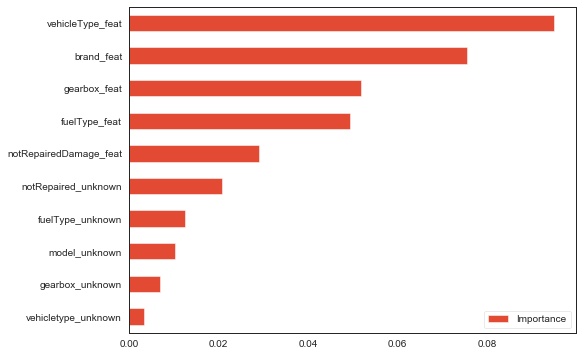

In [209]:
#using decision tree to quickly go over the factor importance
plot_variable_importance(X, Y)

In [194]:
#import the necessary package used to split the data set and 
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, Lasso, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score, train_test_split

# divide data into training and test set
test_size = .33

#Split into train and validation
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=test_size, random_state = 3)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)


(203149, 15) (100059, 15) (203149,) (100059,)


In [195]:
X_train.head()

,yearOfRegistration,powerPS,kilometer,monthOfRegistration,notRepaired_unknown,fuelType_unknown,vehicletype_unknown,gearbox_unknown,model_unknown,gearbox_feat,notRepairedDamage_feat,model_feat,brand_feat,fuelType_feat,vehicleType_feat
38403,2000,82,80000,1,0.0,0.0,0.0,0.0,0.0,1,1,33,20,1,4
213228,2004,105,150000,1,0.0,0.0,0.0,0.0,0.0,1,1,10,19,1,6
304796,1997,44,150000,1,0.0,0.0,0.0,0.0,0.0,1,1,84,24,1,4
283021,1999,65,150000,1,0.0,1.0,0.0,0.0,1.0,1,0,163,24,7,4
158421,2001,118,150000,3,0.0,0.0,0.0,0.0,0.0,1,0,11,2,1,5


# using random forest to train the model

In [199]:
#simply train the data using random forest
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr.score(X_val, y_val)


/Users/lukezhao/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8559510123096423

In [201]:
#use the GridSearch to set the optimal parameteres for the regressor, then train the final model.
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()

param_grid = { "criterion" : ["mse"]
              , "min_samples_leaf" : [3]
              , "min_samples_split" : [3]
              , "max_depth": [10]
              , "n_estimators": [500]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=1)
gs = gs.fit(X_train, y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  1.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  1.6min finished


In [202]:
print(gs.best_score_)
print(gs.best_params_)

0.8390858124568586
{'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 500}
